Fitting 3 folds for each of 10 candidates, totalling 30 fits
new hyperparams -  {'n_estimators': 204, 'max_depth': 5, 'eta': 0.27596290300820486}
accuracy - 0.9916666666666667
classifiction report -
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       608
         1.0       0.99      0.99      0.99       592

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200

confusion matrix - 
[[604   4]
 [  6 586]]


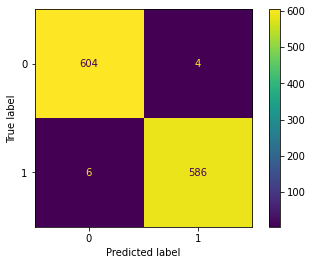

In [4]:
#imports
from pandas import read_csv
import numpy as np
from sklearn import metrics, model_selection
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

#read the training data
path = "TrainingDataBinary.csv"
data = read_csv(path, header=0)
#split the data into the feature columns and the target column (x and y respectively)
x = data[data.columns[:-1]]
y = data["marker"]

#splits the training data into training and testing (80:20 training to testing)
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

#using XGBoost for speed and ease of handling the size of data
model = XGBClassifier()
#establishing parameters to be searched through
params = {
    #number of rounds - allowing space for overfitting and underfitting 
    'n_estimators': np.random.randint(50, 250, size=10),
    #max tree depth
    'max_depth': np.random.randint(3, 10, size=10),
    #how much the learning rate shrinks by
    'eta': np.random.uniform(0.01, 0.3, size=10),
}
#using a randomized search to tune hyperparameters for speed 
randSearch = model_selection.RandomizedSearchCV(model, param_distributions=params, verbose=True, n_iter=10, cv=3)
randSearch.fit(xTrain, yTrain)
#output the new parameters
print('new hyperparams - ',  randSearch.best_params_)
#set the model to use the best possible parameters
newModel = randSearch.best_estimator_
#test the new model on the test data cut from the training data
yPred = newModel.predict(xTest)
#output metrics from the new model
print('accuracy - ' + str(metrics.accuracy_score(yTest, yPred)))
print('classifiction report -\n' + metrics.classification_report(yTest, yPred))
cm = metrics.confusion_matrix(yTest, yPred)
print('confusion matrix - \n' + str(cm))
#display confusion matrix
cmDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1]) 
cmDisplay.plot()
plt.show()
#add the new testing data 
path = "TestingDataBinary.csv"
newdf = read_csv(path, header=0)
#get all the features into the new model
x = newdf[newdf.columns]
#predict the desired values using the new model
newdf['marker'] = newModel.predict(x)
#output the results
newdf.to_csv('TestingResultsBinary.csv', index=False)